# Introduction to neural networks classification with TensorFlow
A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [396]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [397]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


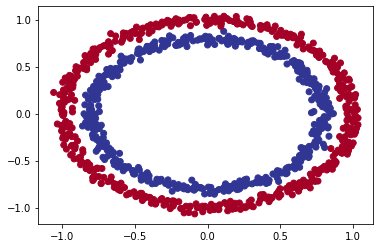

In [398]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [399]:
X.shape, y.shape

((1000, 2), (1000,))

In [400]:
len(X)

1000

In [401]:
import tensorflow as tf

model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer((1000)))
# model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(X, y, batch_size=1000, epochs=170)

Epoch 1/170
1/1 [==============================] - 0s 382ms/step - loss: 0.6935 - accuracy: 0.4990
Epoch 2/170
1/1 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5060
Epoch 3/170
1/1 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5080
Epoch 4/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5190
Epoch 5/170
1/1 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5210
Epoch 6/170
1/1 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5330
Epoch 7/170
1/1 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5330
Epoch 8/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.5800
Epoch 9/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.6240
Epoch 10/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.6050
Epoch 11/170
1/1 [=========

In [402]:
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9980


[0.05860958620905876, 0.9980000257492065]

In [403]:
import numpy as np


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = (
        np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape((xx.shape))


    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing binary classification


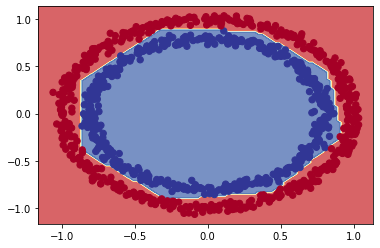

In [404]:
plot_decision_boundary(model, X, y)

In [405]:
# Create a tensor

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

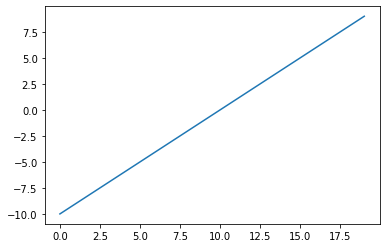

In [406]:
plt.plot(A)

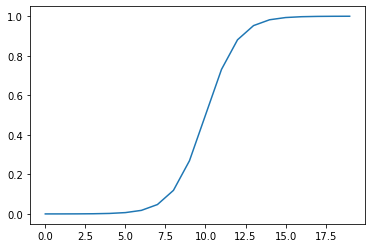

In [407]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(A))

In [408]:
len(X)

1000

In [409]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [410]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=25, verbose=1)


Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [411]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849122524261, 1.0]

doing binary classification
doing binary classification


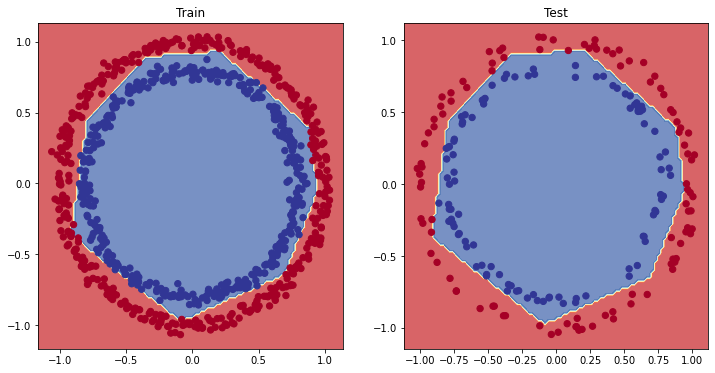

In [412]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [413]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


<AxesSubplot:>

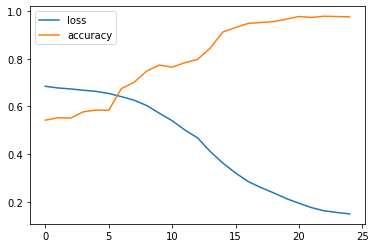

In [414]:
pd.DataFrame(history.history).plot()

# Finding the best learning rate
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.

In [415]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

<AxesSubplot:xlabel='epochs'>

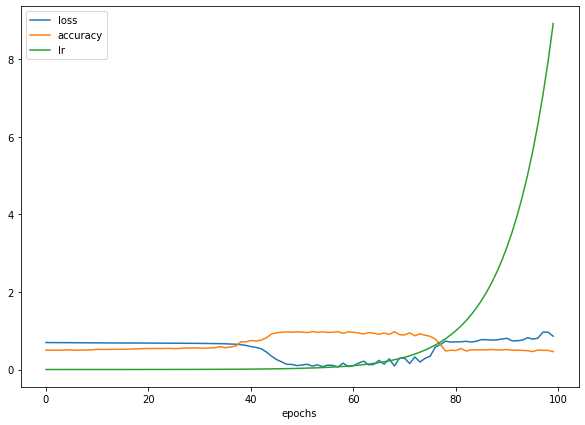

In [416]:
history.history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning Rate vs Loss')

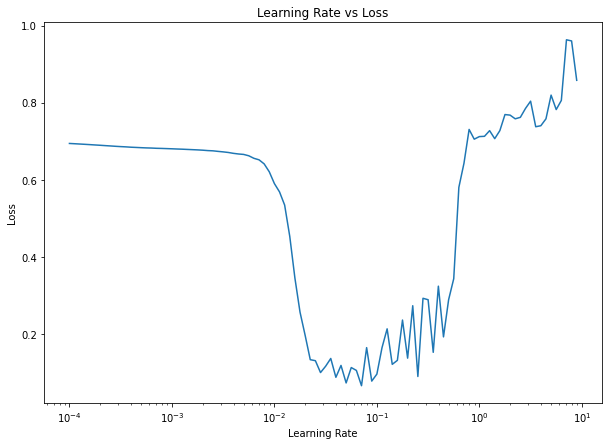

In [417]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

In [418]:
# Example of other typical learning rates values
10 ** 0, 10 ** -1, 10 ** -2, 10 ** -3, 10 ** -4

(1, 0.1, 0.01, 0.001, 0.0001)

In [419]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

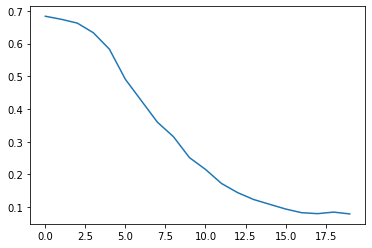

In [420]:
# history.history
# pd.DataFrame(history.history).plot()
plt.plot(history.history['loss'])

In [421]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

doing binary classification
doing binary classification


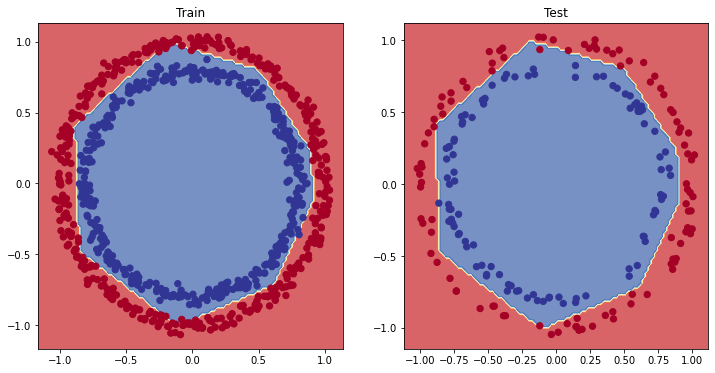

In [422]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from sci-kit learn)

In [423]:
# Check the accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Model loss on the test set: ', loss)
print('Accuracy on the test set: {0}%'.format(accuracy*100))


7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set:  0.05740181356668472
Accuracy on the test set: 99.00000095367432%


# Create a Confusion Matrix

In [424]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

## Prettify confusion matrix (plot)

In [425]:
import itertools


def plot_confusion_matrix(y_test, y_preds, classes=None, figsize=(10,10), text_size=15):
    # figsize = (10, 10)
    y_preds = tf.round(y_preds)

    cm = confusion_matrix(y_test, y_preds)
    cm_norm = (
        cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    )  # normalize the confusion matrix
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
    )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size,
        )


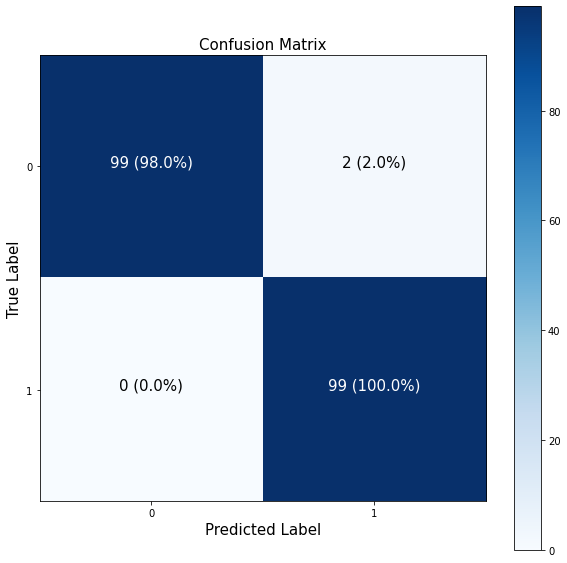

In [426]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (multiclass classification)

In [427]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [428]:
len(train_data), len(train_labels), train_data.shape, train_labels.shape

(60000, 60000, (60000, 28, 28), (60000,))

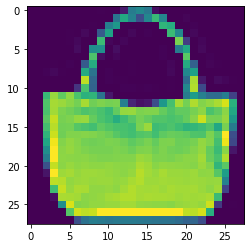

In [429]:
plt.imshow(train_data[100])

In [430]:
train_labels[100]

8

In [431]:
class_names = [
    "T-shirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]


Text(0.5, 1.0, 'Shirt')

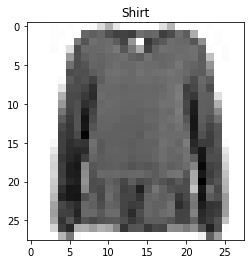

In [432]:
index_of_choice = 18
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

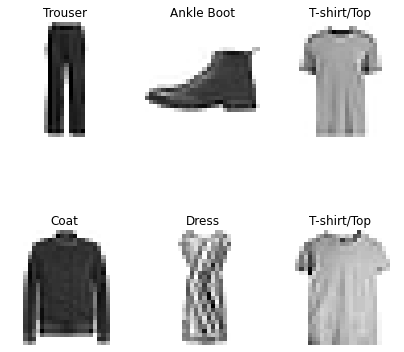

In [433]:
import random
plt.figure(figsize=(7,7))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [434]:
train_data.shape

(60000, 28, 28)

In [435]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer((28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

non_norm_history = model.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    verbose=1,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [436]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_163 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_164 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [437]:
train_data.min(), train_data.max()

(0, 255)

In [438]:
train_data = train_data / 255
test_data = test_data / 255
train_data.max()

1.0

In [439]:
# tf.random.set_seed(42)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer((28, 28)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(4, activation="relu"))
# model.add(tf.keras.layers.Dense(4, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))


# model.compile(
#     loss="categorical_crossentropy",
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=["accuracy"],
# )

# norm_history = model.fit(
#     train_data,
#     tf.one_hot(train_labels, depth=10),
#     epochs=10,
#     verbose=1,
#     validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
# )

In [440]:
# import pandas as pd

# pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# pd.DataFrame(norm_history.history).plot(title='Normalized data')

In [441]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer((28, 28)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    verbose=1,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
    callbacks=[lr_scheduler]
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

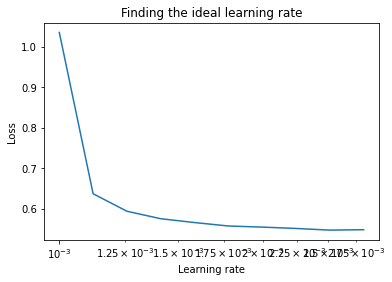

In [442]:
lrs = 1e-3 * (10**(tf.range(10)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

In [448]:
y_probs = model.predict(test_data)
y_probs[:5]
y_preds = y_probs.argmax(axis=1)
y_preds



array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

In [449]:
confusion_matrix(test_labels, y_preds)

array([[775,  14,  25,  62,  10,   2, 105,   0,   7,   0],
       [  4, 947,   2,  26,   8,   0,  13,   0,   0,   0],
       [ 33,   2, 628,   5, 228,   0,  97,   0,   7,   0],
       [ 65,  23,  14, 781,  70,   0,  42,   1,   4,   0],
       [  1,   1,  74,  22, 831,   0,  65,   0,   4,   2],
       [  0,   0,   0,   0,   0, 901,   0,  56,   5,  38],
       [167,   8, 161,  44, 214,   2, 391,   0,  13,   0],
       [  0,   0,   0,   0,   0,  31,   0, 923,   0,  46],
       [  5,   1,  52,  21,  22,  11,   9,   6, 869,   4],
       [  0,   0,   1,   0,   3,  22,   0,  45,   1, 928]], dtype=int64)

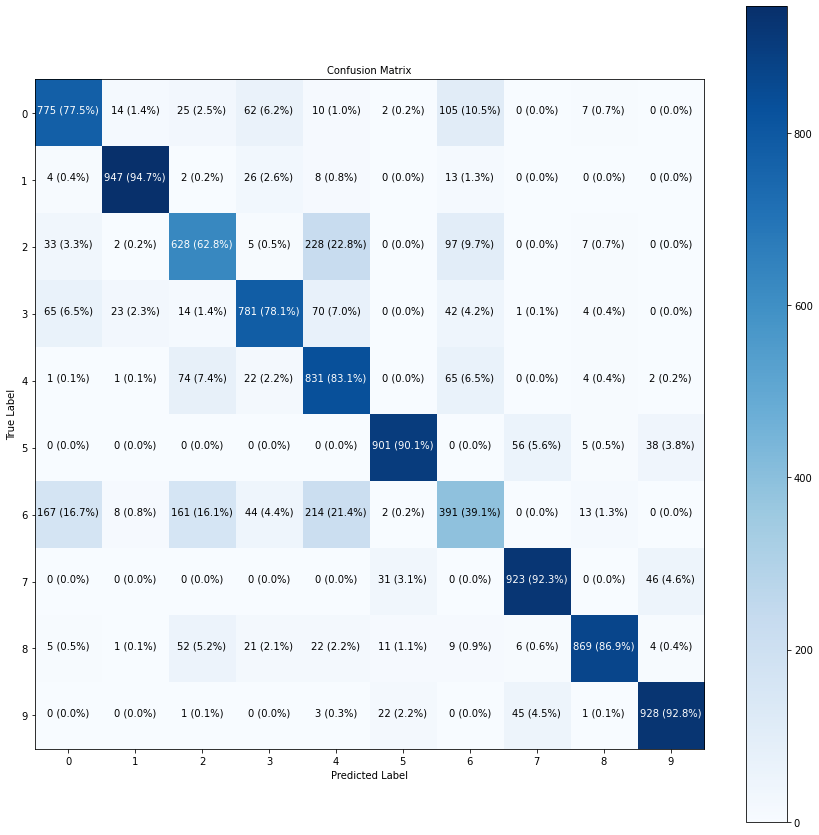

In [450]:
plot_confusion_matrix(test_labels, y_preds, class_names, (15,15), 10)

In [451]:
def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_labels:
        color = "green"
    else:
        color = "red"

    plt.xlabel(
        "Pred: {} {:2.0f}% (True {})".format(
            pred_label, 100 * tf.reduce_max(pred_probs), true_labels
        ),
        color=color,
    )


In [ ]:
plot_random_image(model, test_data, test_labels, class_names)